# <b>Análise exploratória de dados de terremotos pelo mundo</b>
---


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy
import seaborn as sns




- Título: Nome dado ao terremoto

- Magnitude: Magnitude do terremoto

- Data e Hora: Data e hora do evento

- CDI (Comunidade Determinou Intensidade): Intensidade máxima relatada para o evento

- MMI (Intensidade Instrumental Estimada Máxima): Intensidade instrumental estimada máxima para o evento

- Alerta: Nível de alerta - "verde", "amarelo", "laranja" e "vermelho"

- Tsunami: "1" para eventos em regiões oceânicas e "0" caso contrário

- SIG: Um número descrevendo a significância do evento. Números maiores indicam um evento mais significativo. Esse valor é determinado por vários fatores, incluindo magnitude, MMI máximo, relatos de sentidos e impacto estimado

- NET: ID do contribuidor de dados. Identifica a rede considerada a fonte preferencial de informações para este evento

- NST (Número Total de Estações Sísmicas Usadas): O número total de estações sísmicas usadas para determinar a localização do terremoto

- DMIN (Distância Horizontal ao Epicentro até a Estação Mais Próxima): Distância horizontal do epicentro até a estação mais próxima

- GAP (Ângulo Azimutal Máximo entre Estações Azimutais Adjacentes): Em geral, quanto menor esse número, mais confiável é a posição horizontal calculada do terremoto. Localizações de terremotos em que o ângulo azimutal ultrapassa 180 graus normalmente têm grandes incertezas quanto à localização e profundidade

- Tipo de Magnitude (magType): O método ou algoritmo usado para calcular a magnitude preferencial do evento

- Profundidade: A profundidade onde o terremoto começa a se romper

- Latitude/Longitude: Sistema de coordenadas pelo qual a posição ou localização de qualquer lugar na superfície da Terra pode ser determinado e descrito

- Localização: Localização dentro do país

- Continente: Continente do país afetado

- País: País afetado

In [4]:
dataframe = pd.read_csv("./datasets/earthquake_1995-2023.csv")
dataframe.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


In [6]:
dataframe[dataframe["country"] == "Brazil"]

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
52,"M 6.5 - 107 km SSW of Tarauacá, Brazil",6.5,08-06-2022 00:55,3,2,green,0,653,us,236,1.999,31.0,mww,622.73,-9.0618,-71.1647,"Tarauacá, Brazil",South America,Brazil
176,"M 6.8 - 90km W of Tarauaca, Brazil",6.8,05-01-2019 19:25,3,3,green,0,715,us,0,1.181,16.0,mww,570.41,-8.1440,-71.5870,"Tarauaca, Brazil",South America,Brazil
302,"M 6.7 - 125 km SSW of Tarauacá, Brazil",6.7,26-11-2015 05:45,2,3,green,0,691,us,0,2.033,19.0,mww,602.75,-9.1825,-71.2574,"Tarauacá, Brazil",South America,Brazil


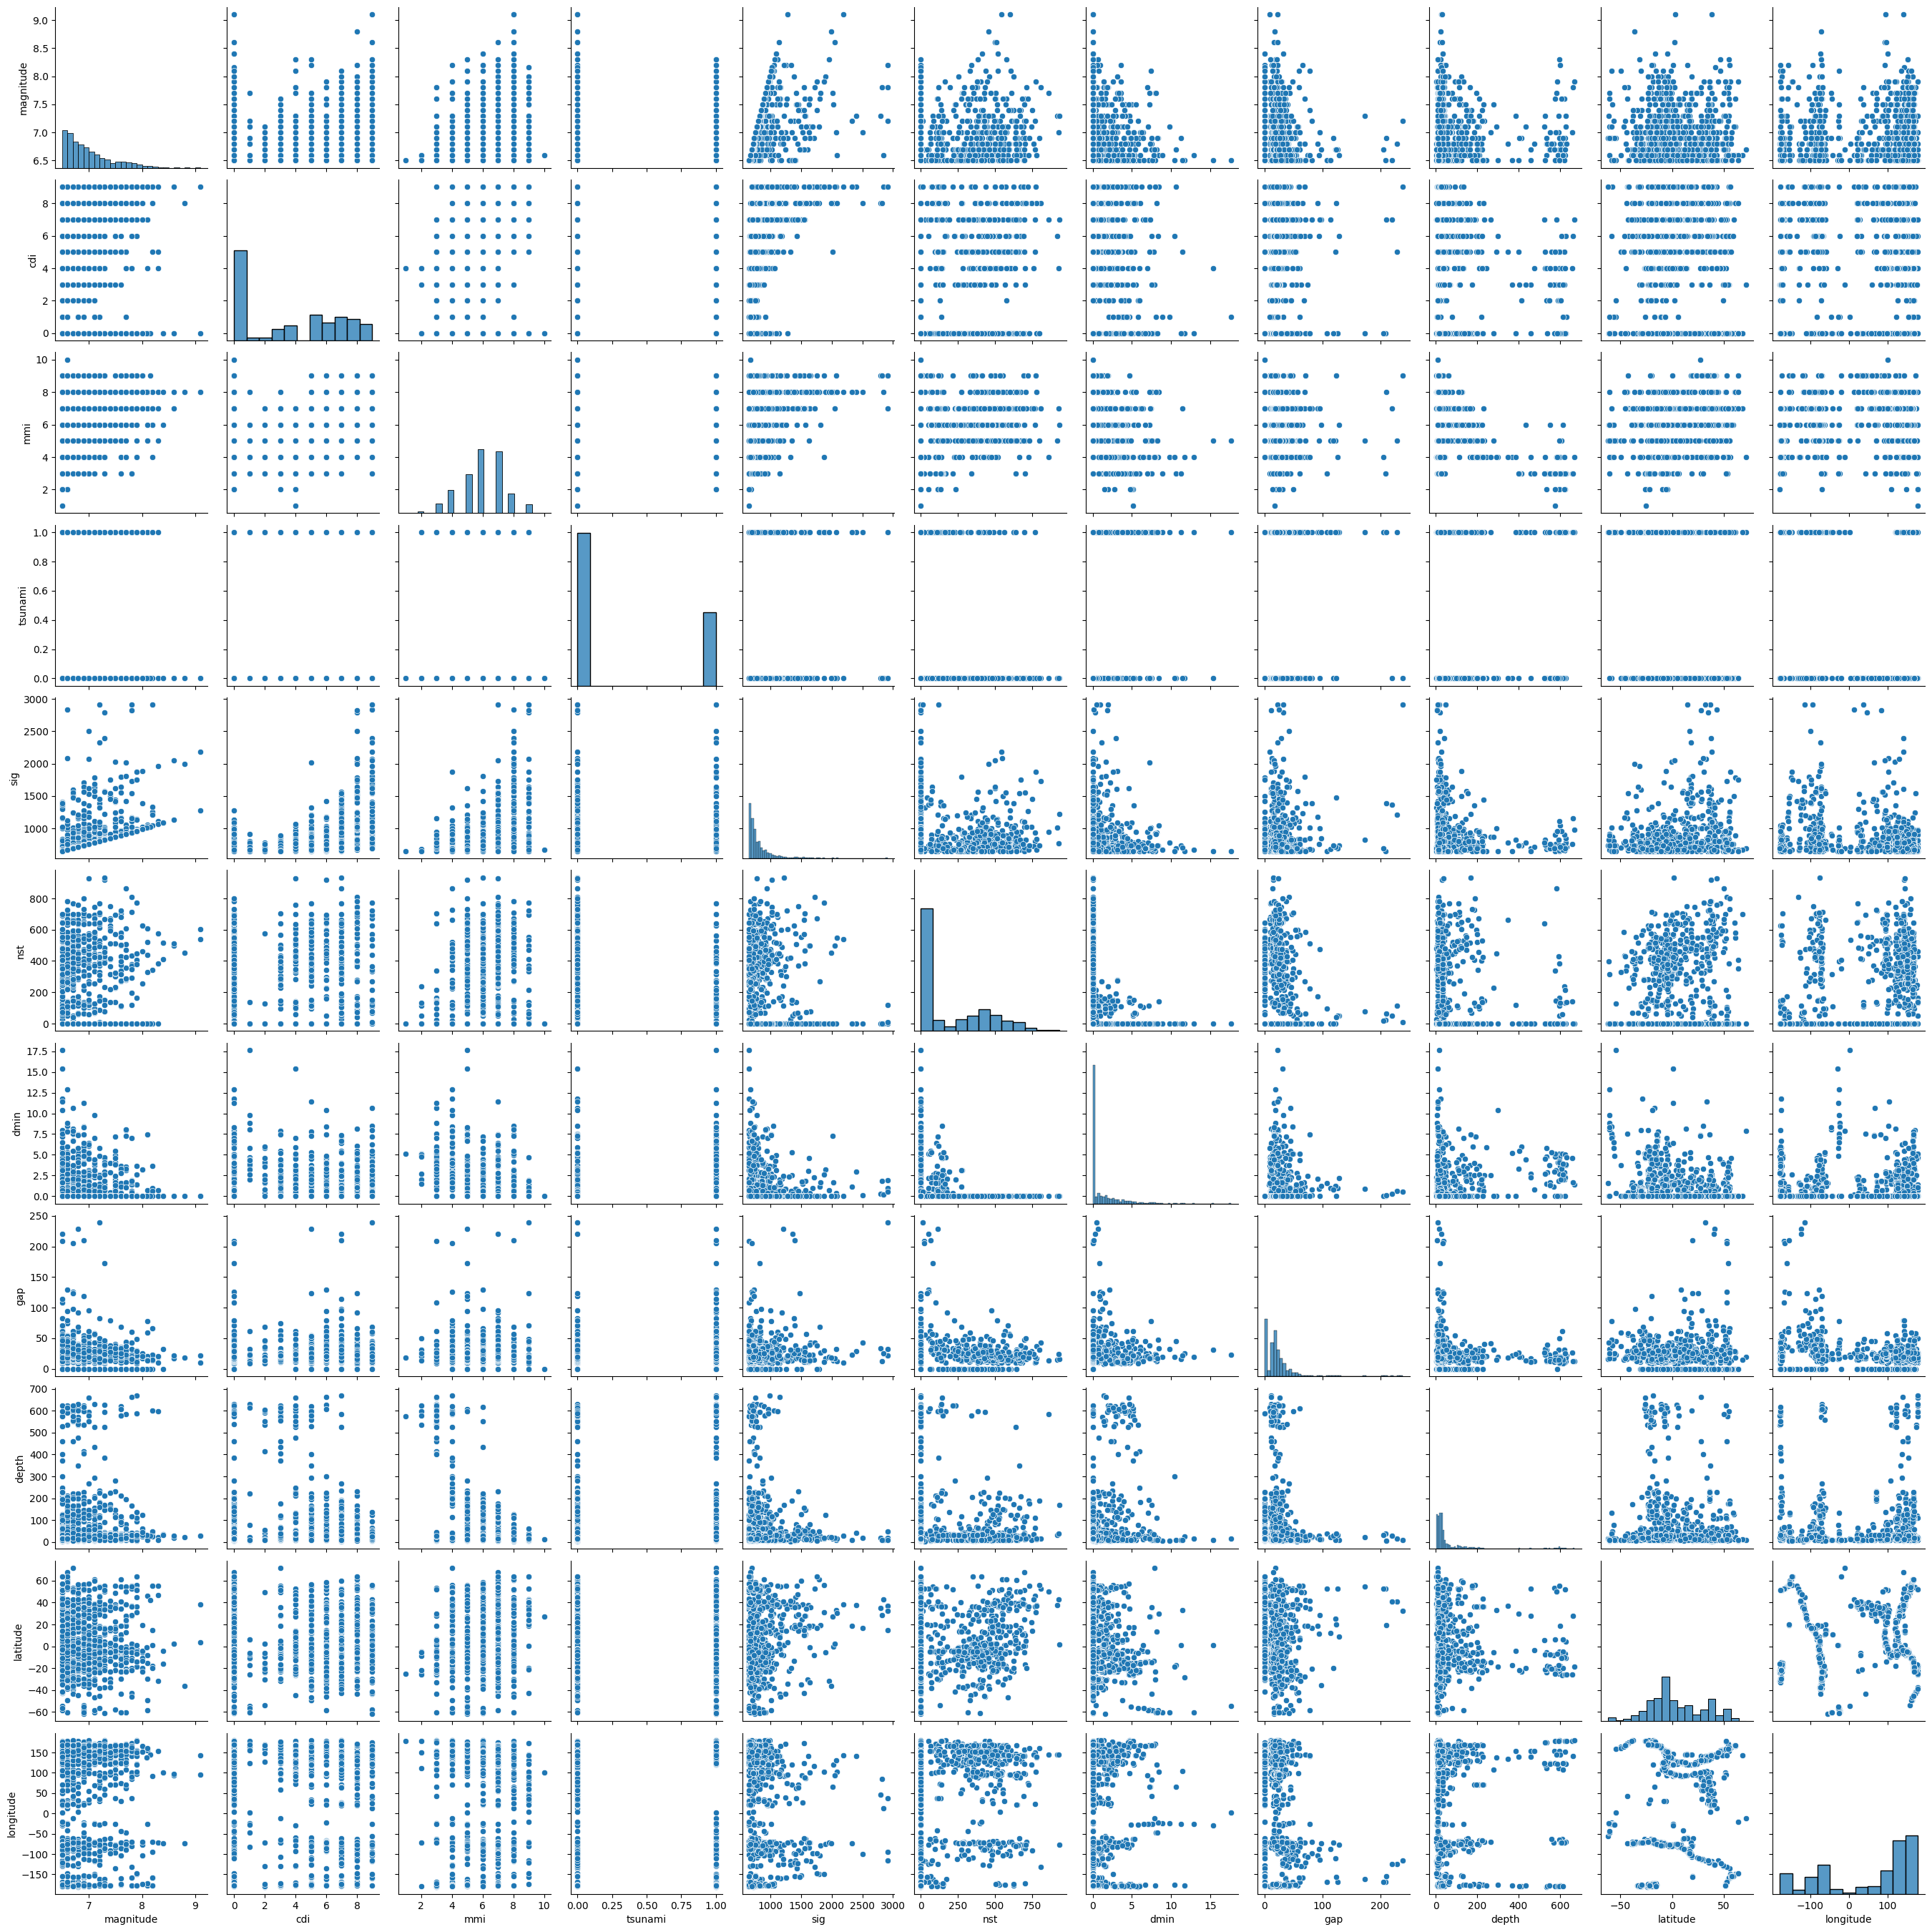

In [15]:
sns.pairplot(dataframe)
 

In [18]:
dataframe["cdi"].unique()

array([7, 8, 6, 0, 5, 4, 3, 9, 1, 2], dtype=int64)

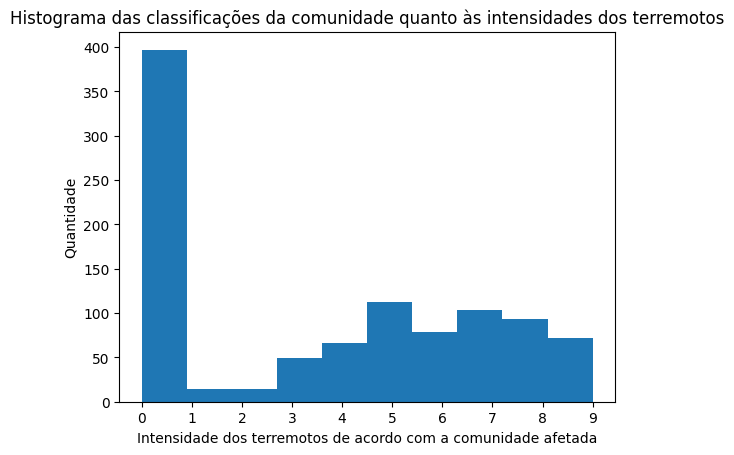

In [32]:
plt.figure()
plt.hist(dataframe["cdi"])
plt.xticks(dataframe["cdi"].unique())
plt.title("Histograma das classificações da comunidade quanto às intensidades dos terremotos")
plt.xlabel("Intensidade dos terremotos de acordo com a comunidade afetada")
plt.ylabel("Quantidade")
plt.show()

In [38]:
dicionario = {i:dataframe[dataframe["cdi"] == i]["cdi"].count() for i in sorted(dataframe["cdi"].unique())}

for item in dicionario.items():
    print(f"Quantidade de terremotos classificados pela comunidade como risco {item[0]}: {item[1]}")

Quantidade de terremotos classificados pela comunidade como risco 0: 397
Quantidade de terremotos classificados pela comunidade como risco 1: 14
Quantidade de terremotos classificados pela comunidade como risco 2: 14
Quantidade de terremotos classificados pela comunidade como risco 3: 49
Quantidade de terremotos classificados pela comunidade como risco 4: 66
Quantidade de terremotos classificados pela comunidade como risco 5: 113
Quantidade de terremotos classificados pela comunidade como risco 6: 79
Quantidade de terremotos classificados pela comunidade como risco 7: 103
Quantidade de terremotos classificados pela comunidade como risco 8: 93
Quantidade de terremotos classificados pela comunidade como risco 9: 72


In [39]:
dataframe["tsunami"].mean()

0.325

In [48]:
dataframe[dataframe["country"] == "Japan"]["tsunami"].mean()

0.23076923076923078